In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('hr_comma_sep.xlsx')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
#checking for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
#exploratory data analysis
corr=df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


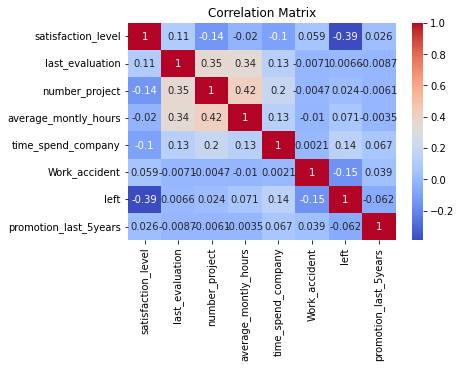

In [9]:
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

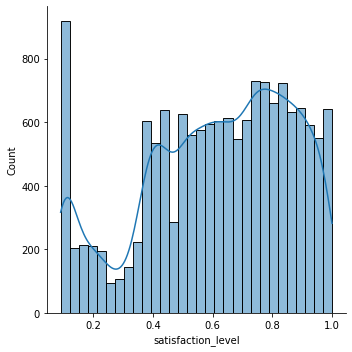

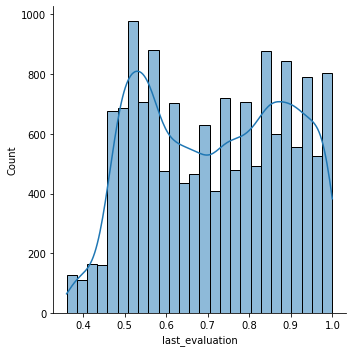

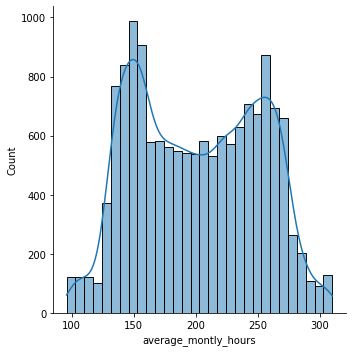

In [10]:
#To create distribution plot
sns.displot(df, x='satisfaction_level', kde=True)
sns.displot(df, x='last_evaluation', kde=True)
sns.displot(df, x='average_montly_hours', kde=True)
plt.show()

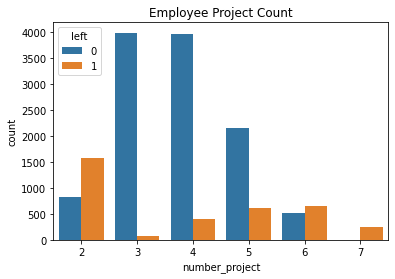

In [11]:
sns.countplot(data=df, x='number_project', hue='left')
plt.title('Employee Project Count')
plt.show()

In [12]:
# clustring of employees
from sklearn.cluster import KMeans

In [13]:
employee_clu= df[['satisfaction_level', 'last_evaluation', 'left']]
employee_clu

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [14]:
left_employee = employee_clu[employee_clu['left'] == 1]
left_employee

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [15]:
#kmeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(left_employee)

KMeans(n_clusters=3)

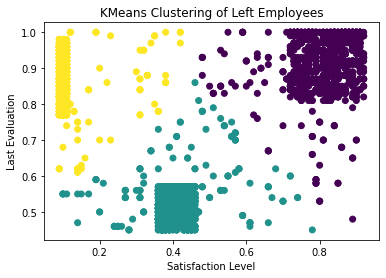

In [16]:
plt.scatter(left_employee['satisfaction_level'], left_employee['last_evaluation'], c=kmeans.labels_)
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('KMeans Clustering of Left Employees')
plt.show()

In [17]:
print(kmeans.cluster_centers_)

[[0.80851586 0.91170931 1.        ]
 [0.41014545 0.51698182 1.        ]
 [0.11115466 0.86930085 1.        ]]


In [18]:
# left class imbalance using SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [19]:
# Separate categorical variables and numeric variables
categorical_vars = df.select_dtypes(include=['object']).columns
numeric_vars = df.select_dtypes(include=['int', 'float']).columns

In [20]:
categorical_vars

Index(['sales', 'salary'], dtype='object')

In [21]:
numeric_vars

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [22]:
data_encoded = pd.get_dummies(df, columns=categorical_vars)
data_encoded

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [23]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [24]:
# Combine categorical variables and numeric variables
X = pd.concat([data_encoded.drop('left', axis=1), df[numeric_vars]], axis=1)
y = data_encoded['left']

In [27]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,...,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,0,0,0,0,...,1,0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,...,0,1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,0,0,0,0,...,0,1,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,0,0,0,0,...,1,0,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,...,1,0,0.37,0.52,2,159,3,0,1,0


In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123, stratify=y)

In [30]:
X_train.shape

(11999, 28)

In [31]:
X_test.shape

(3000, 28)

In [26]:
# Upsample the train dataset using SMOTE technique
sm = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
logreg = LogisticRegression(max_iter=2000)

In [35]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [36]:
logreg_predict = logreg.predict(X_test)

In [37]:
accuracy_score(y_test, logreg_predict)

1.0

In [38]:
print(classification_report(y_test , logreg_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2286
           1       1.00      1.00      1.00       714

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [39]:
cm= confusion_matrix(y_test, logreg_predict)
cm

array([[2286,    0],
       [   0,  714]])

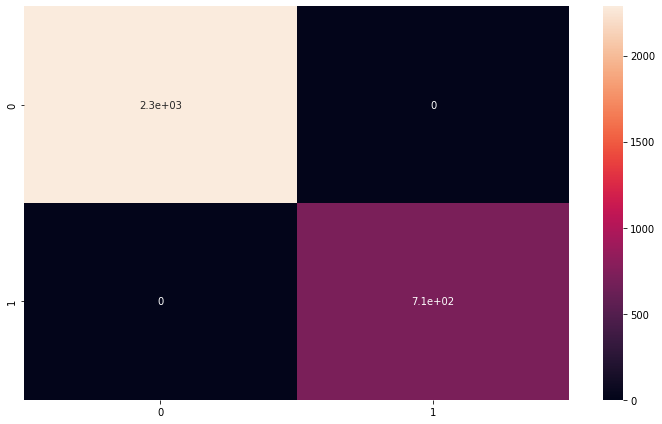

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
ranforest = RandomForestClassifier(n_estimators=100)

In [46]:
ranforest.fit(X_train , y_train)

RandomForestClassifier()

In [47]:
ranforest_predictions = ranforest.predict(X_test)

In [48]:
accuracy_score(y_test , ranforest_predictions)

1.0

In [49]:
print(classification_report(y_test , ranforest_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2286
           1       1.00      1.00      1.00       714

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [52]:
cm1 = confusion_matrix(y_test, ranforest_predictions)
cm1

array([[2286,    0],
       [   0,  714]])

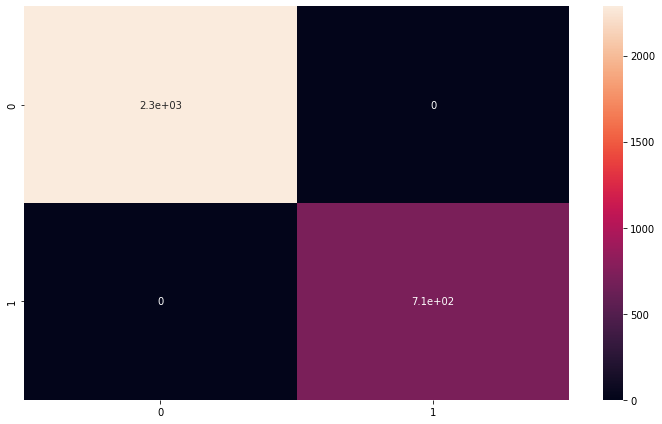

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(cm1, annot=True)
plt.tight_layout()
plt.show()

In [56]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV

In [59]:
parameter={
    "criterion":["gini","entropy"],
    "n_estimators":[10,100,150,200],
    "min_samples_leaf":[1,2,4,6],
    "max_features":["auto","sqrt","log2"]
    }

In [61]:
kfold = StratifiedKFold(n_splits=5)

In [63]:
clf = GridSearchCV(ranforest, parameter, scoring="accuracy", n_jobs=2, cv=kfold)

In [64]:
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [10, 100, 150, 200]},
             scoring='accuracy')

In [69]:
clf.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [70]:
clf.score(X_test, y_test)

1.0

In [74]:
# probability of employee turnover in test data
green = ranforest_predictions< 0.2
yellow = (ranforest_predictions >= 0.2) & (ranforest_predictions < 0.6)
orange = (ranforest_predictions >= 0.6) & (ranforest_predictions < 0.9)
red = ranforest_predictions >= 0.9

In [75]:
# number of employees in each zone
print('Green:', sum(green))
print('Yellow:', sum(yellow))
print('Orange:', sum(orange))
print('Red:', sum(red))

Green: 2286
Yellow: 0
Orange: 0
Red: 714
